# 5.텐서플로 허브

In [ ]:
import tensorflow_hub as hub

In [ ]:
model = tf.keras.Sequential([
          hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                         input_shape=(224,224,3),
                         trainable=False),
          tf.keras.layers.Dense(2, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              58331648  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 58,335,746
Trainable params: 4,098
Non-trainable params: 58,331,648
_________________________________________________________________


In [ ]:
train = ImageDataGenerator(
                 rescale=1./255,
                 rotation_range=10,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                 shear_range=0.1,
                 zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs  = 10,
                    validation_data = valid_generator,
                    verbose = 2)

Epoch 1/10
13/13 - 61s - loss: 0.8908 - accuracy: 0.6857 - val_loss: 0.3353 - val_accuracy: 0.9184
Epoch 2/10
13/13 - 49s - loss: 0.3592 - accuracy: 0.8701 - val_loss: 0.2210 - val_accuracy: 0.9592
Epoch 3/10
13/13 - 49s - loss: 0.2990 - accuracy: 0.8753 - val_loss: 0.1935 - val_accuracy: 0.9286
Epoch 4/10
13/13 - 49s - loss: 0.2523 - accuracy: 0.9143 - val_loss: 0.3107 - val_accuracy: 0.8571
Epoch 5/10
13/13 - 49s - loss: 0.2188 - accuracy: 0.9091 - val_loss: 0.2334 - val_accuracy: 0.9184
Epoch 6/10
13/13 - 49s - loss: 0.1843 - accuracy: 0.9221 - val_loss: 0.2052 - val_accuracy: 0.9286
Epoch 7/10
13/13 - 49s - loss: 0.1923 - accuracy: 0.9351 - val_loss: 0.2296 - val_accuracy: 0.8776
Epoch 8/10
13/13 - 49s - loss: 0.1372 - accuracy: 0.9610 - val_loss: 0.1901 - val_accuracy: 0.9388
Epoch 9/10
13/13 - 49s - loss: 0.1776 - accuracy: 0.9325 - val_loss: 0.1948 - val_accuracy: 0.9184
Epoch 10/10
13/13 - 49s - loss: 0.1324 - accuracy: 0.9481 - val_loss: 0.1623 - val_accuracy: 0.9286


Text(0.5, 1.0, '오차')

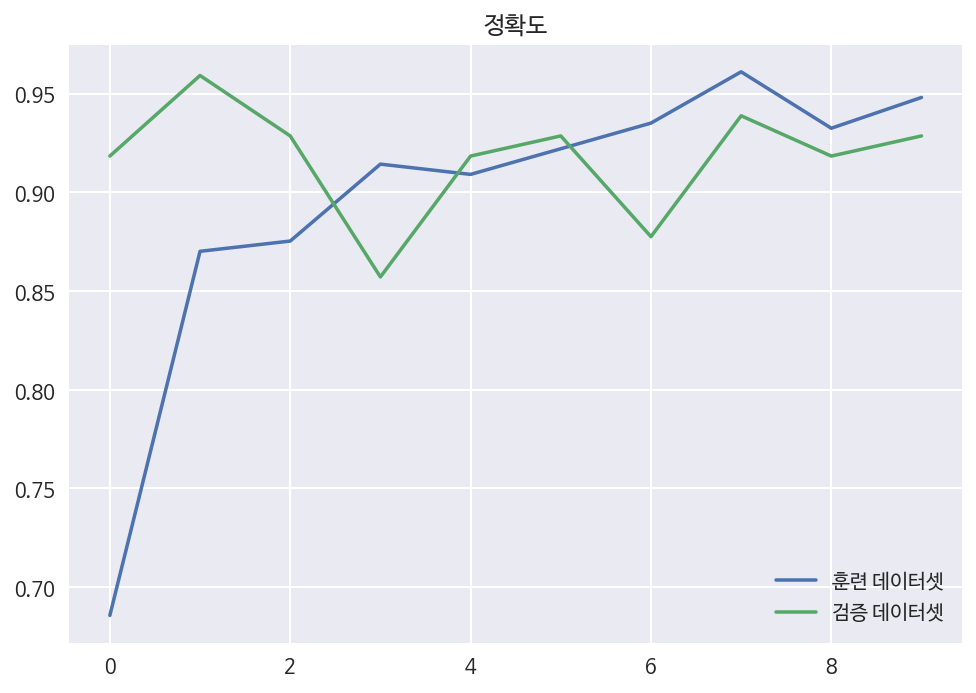

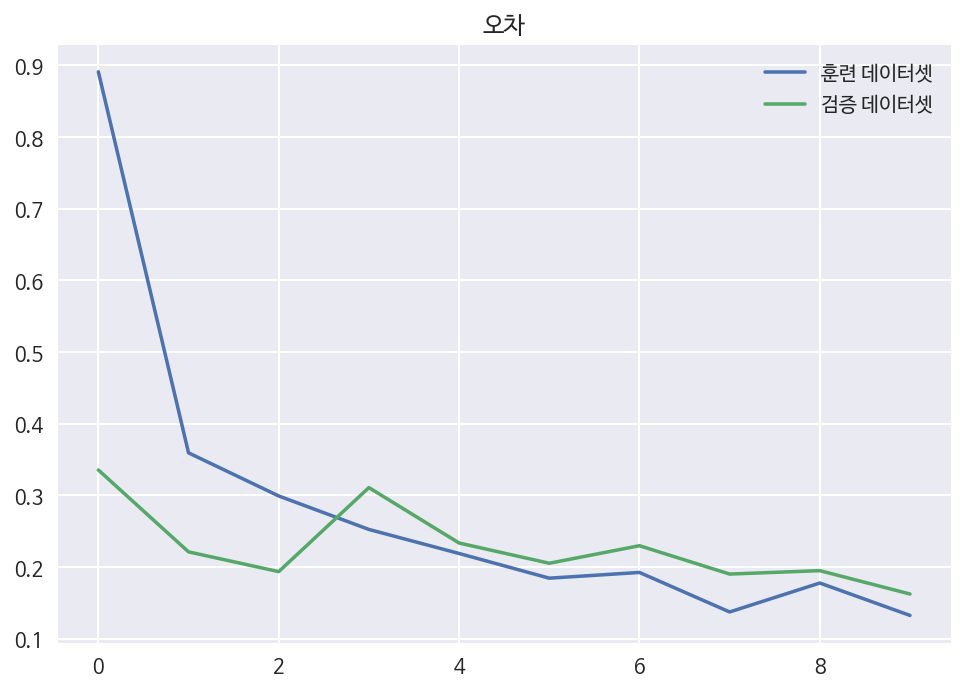

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

결과

- 정확도는 시간이 흐를수록 높아지고 오차는 낮아지기 떄문에 훈련이 잘됨